# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Saidil Halim
- **Email:** saidilhalim25@gmail.com
- **ID Dicoding:** saidil_eyQS

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kombinasi hari kerja, musim, dan kondisi cuaca terhadap tren penyewaan sepeda dalam satu tahun, serta bagaimana proyeksi penggunaan sepeda selama musim yang akan datang berdasarkan data ini?

- Bagaimana hubungan antara temperatur, kecepatan angin, dan kelembaban terhadap jumlah pengguna sepeda pada hari kerja, dan bagaimana pengaruhnya terhadap segmen pengguna kasual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [125]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

**Menilai tabel day_df**

In [126]:
# info data dan jumlah missing value data day_df
day_df.info()
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [127]:
#cek apakah ada duplikat dalam data_df
print("data duplikat ada: ", day_df.duplicated().sum())

data duplikat ada:  0


In [128]:
# mendeskripsikan data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tabel data tidak memiliki missing value dan duplicate
- tabel data memiliki kesalahan data type pada kolom dteday

### Cleaning Data

**Memperbaiki tipe data pada data day_df**

In [129]:
# mengubah data type column dteday dari object menjadi datetime
day_datetime_coloums = ["dteday"]
for column in day_datetime_coloums:
      day_df[column] = pd.to_datetime(day_df[column])

In [130]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Memperbaiki tipe data pada hour_df**

**Insight:**
- data type column dateby sudah diubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore data

**Explore day_df**

In [131]:
# melihat deskripsi data
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [132]:
# menambahkan column weather_condition
weather_labels = {1: 'Cerah', 2: 'Kabut', 3: 'Hujan Ringan', 4: 'Hujan Berat'}
day_df['weather_condition'] = day_df['weathersit'].map(weather_labels)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_condition
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Kabut
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Kabut
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah


In [133]:
# Menambahkan kolom season_text untuk menggambarkan musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_text'] = day_df['season'].map(season_mapping)
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_condition,season_text
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Kabut,Spring
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Kabut,Spring
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah,Spring
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah,Spring
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah,Spring


In [134]:
# Menambahkan kolom is_weekend (0 jika bukan akhir pekan, 1 jika akhir pekan)
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: True if x == 0 or x == 6 else False)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_condition,season_text,is_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Kabut,Spring,True
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Kabut,Spring,True
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah,Spring,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah,Spring,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah,Spring,False


**Menunjukkan apakah hari tersebut merupakan akhir pekan 1 untuk akhir pekan, 0 untuk bukan akhir pekan**

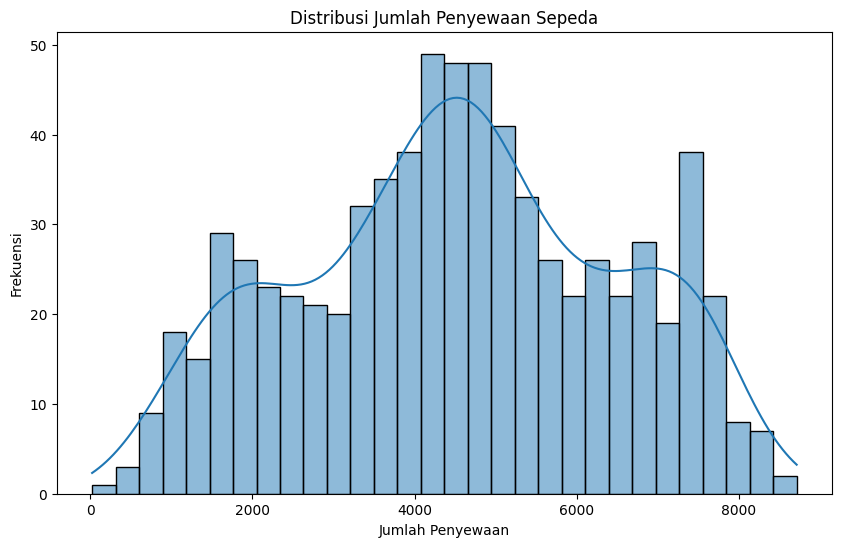

In [135]:
# memeriksa distribusi jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

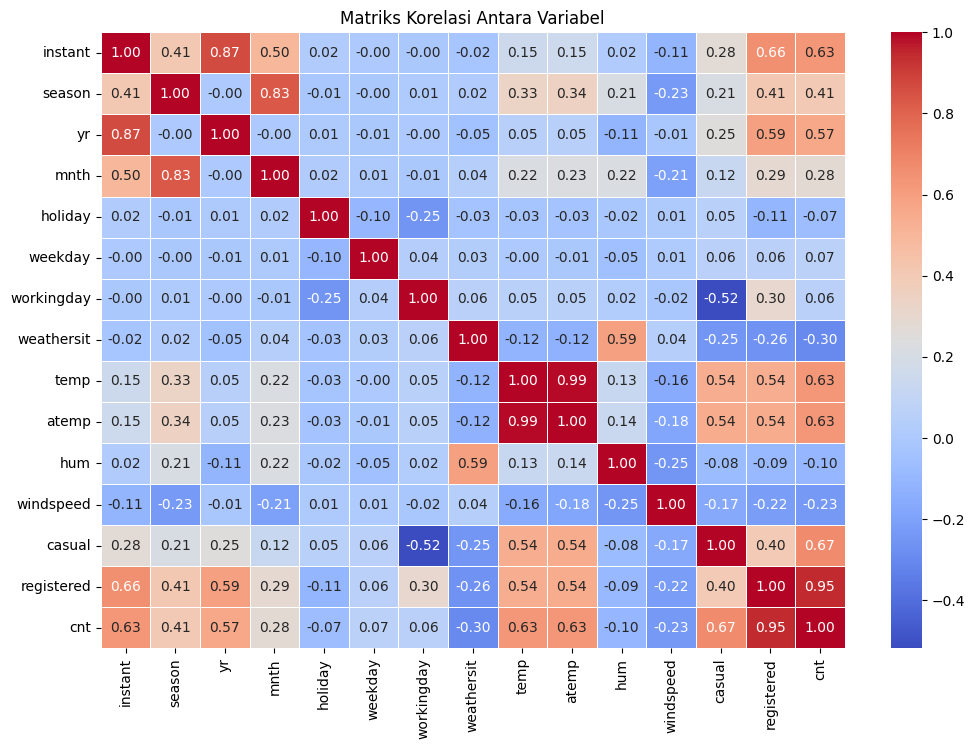

In [136]:
# Visualisasi korelasi antar variabel
correlation_matrix = day_df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Antara Variabel')
plt.show()

**pada matriks korelasi ini, dapat disimpulkan bahwa suhu terasa memiliki pengaruh positif yang kuat terhadap jumlah penyewaan sepeda, sementara kelembapan memiliki pengaruh negatif. Hari kerja dan hari libur mungkin tidak menunjukkan korelasi signifikan terhadap jumlah penyewaan, yang mengisyaratkan bahwa faktor-faktor lain seperti cuaca dan musim mungkin lebih dominan dalam mempengaruhi perilaku penyewaan sepeda.**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kombinasi hari kerja, musim, dan kondisi cuaca terhadap tren penyewaan sepeda dalam satu tahun, serta bagaimana proyeksi penggunaan sepeda selama musim yang akan datang berdasarkan data ini?

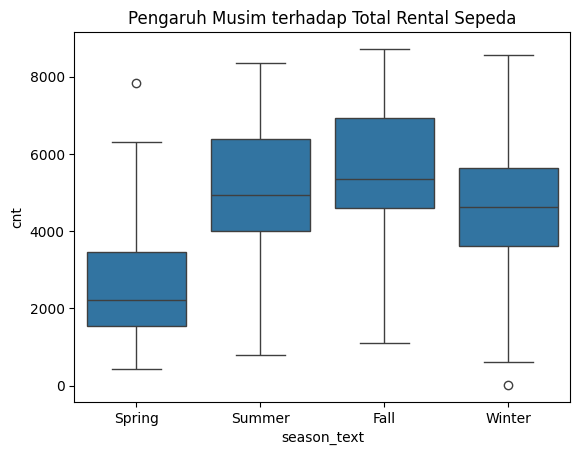

In [137]:
# Pengaruh musim terhadap total rental sepeda
sns.boxplot(x='season_text', y='cnt', data=day_df)
plt.title("Pengaruh Musim terhadap Total Rental Sepeda")
plt.show()


- Dari boxplot ini, dapat dilihat distribusi jumlah penyewaan sepeda (cnt) di setiap musim.

- Musim Panas umumnya menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan dengan Musim Dingin, yang cenderung memiliki       penyewaan paling rendah.

- Musim Semi dan Musim Gugur memiliki jumlah penyewaan yang menengah.

- Hal ini menunjukkan bahwa cuaca yang lebih hangat dan kondisi yang lebih nyaman mendorong lebih banyak orang untuk menyewa sepeda.

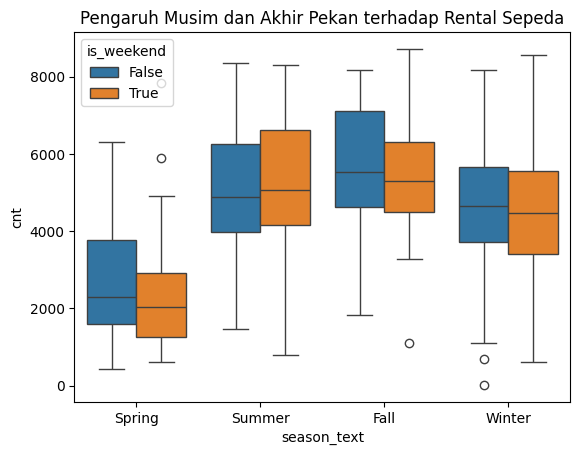

In [138]:
# Membandingkan tren penggunaan sepeda pada hari kerja dan akhir pekan dengan kondisi cuaca
sns.boxplot(x='season_text', y='cnt', hue='is_weekend', data=day_df)
plt.title("Pengaruh Musim dan Akhir Pekan terhadap Rental Sepeda")
plt.show()


- Boxplot ini memperlihatkan bagaimana penyewaan sepeda berbeda antara hari kerja dan akhir pekan dalam konteks setiap musim.

- Biasanya, hari kerja menunjukkan jumlah penyewaan yang lebih stabil, sementara akhir pekan bisa menunjukkan lonjakan yang lebih besar, terutama di musim panas.

- Ini bisa jadi disebabkan oleh lebih banyak orang yang beraktivitas rekreasi atau berlibur pada akhir pekan.

- Pengguna kasual lebih mungkin menyewa sepeda pada akhir pekan, sementara pengguna terdaftar mungkin lebih konsisten menggunakan sepeda pada hari kerja.

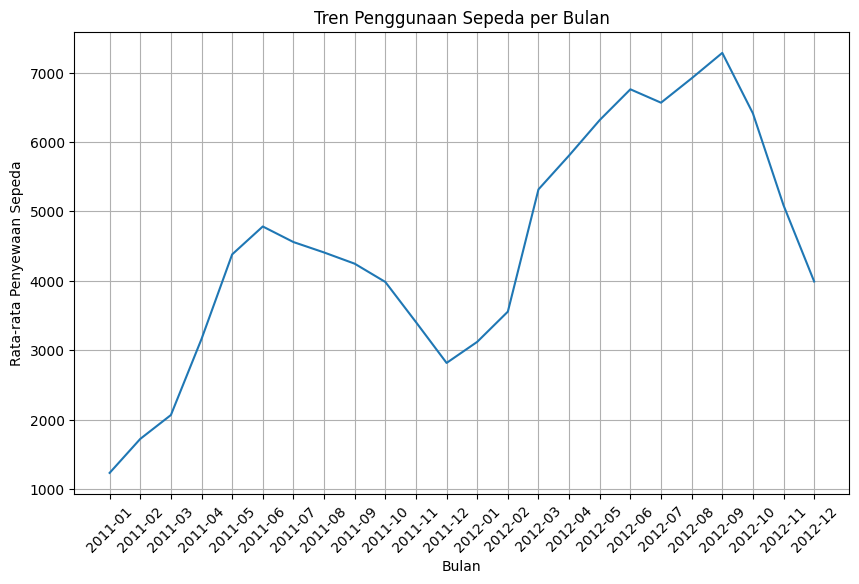

In [139]:
# Membuat kolom year_month dalam format string
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year_month'] = day_df['dteday'].dt.to_period('M').astype(str)

# Mengelompokkan data per bulan dan menghitung rata-rata
monthly_trend = day_df.groupby('year_month')['cnt'].mean().reset_index()

# Memvisualisasikan tren penggunaan sepeda per bulan
plt.figure(figsize=(10, 6))
sns.lineplot(x='year_month', y='cnt', data=monthly_trend)
plt.xticks(rotation=45)
plt.title("Tren Penggunaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid()
plt.show()


- Grafik tren bulanan menunjukkan pola penggunaan sepeda sepanjang tahun.

- Grafik ini dapat mengidentifikasi bulan-bulan puncak (misalnya, musim panas) dan bulan-bulan dengan penggunaan rendah (misalnya, musim dingin).

- Insight ini penting untuk perencanaan, seperti penambahan jumlah sepeda dan stasiun pada musim sibuk atau penyesuaian layanan selama musim sepi.


### Pertanyaan 2: Bagaimana hubungan antara temperatur, kecepatan angin, dan kelembaban terhadap jumlah pengguna sepeda pada hari kerja, dan bagaimana pengaruhnya terhadap segmen pengguna kasual dan terdaftar?

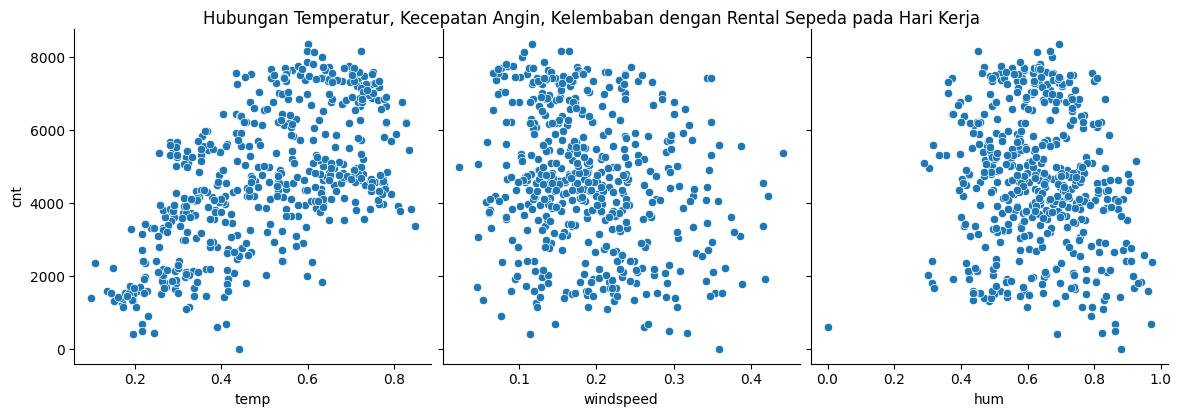

In [140]:
# Filter data hanya untuk hari kerja
workingday_df = day_df[day_df['workingday'] == 1]

# Hubungan cuaca dengan total rental sepeda pada hari kerja
sns.pairplot(workingday_df, x_vars=['temp', 'windspeed', 'hum'], y_vars='cnt', height=4)
plt.suptitle("Hubungan Temperatur, Kecepatan Angin, Kelembaban dengan Rental Sepeda pada Hari Kerja", y=1.02)
plt.show()


- Pairplot ini menunjukkan hubungan antara variabel cuaca (temperatur, kecepatan angin, dan kelembaban) dengan jumlah penyewaan sepeda.

- Terdapat korelasi positif antara temperatur dan jumlah penyewaan sepeda, artinya semakin tinggi temperatur, semakin banyak orang yang menyewa sepeda.

- Sebaliknya, kecepatan angin menunjukkan korelasi negatif; semakin tinggi kecepatan angin, semakin sedikit penyewaan, yang mungkin disebabkan oleh ketidaknyamanan saat bersepeda.

- Kelembaban mungkin menunjukkan pola yang lebih kompleks, tetapi biasanya juga akan mengurangi kenyamanan saat bersepeda, sehingga mempengaruhi jumlah penyewaan.

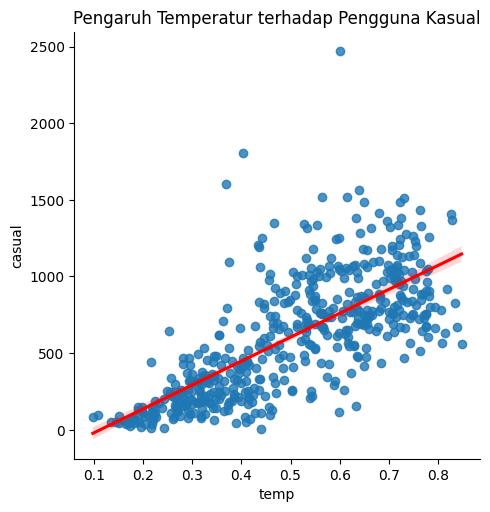

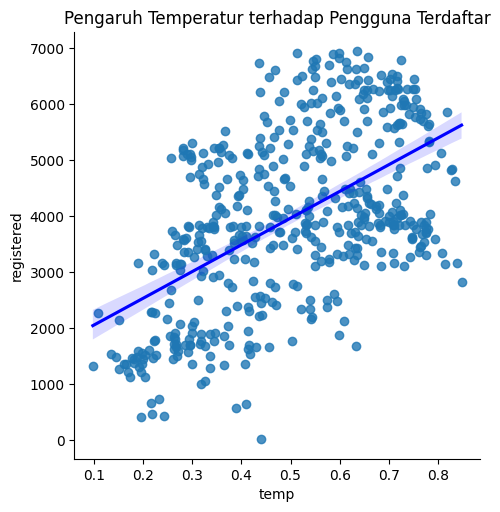

In [141]:
# Visualisasi pengaruh cuaca terhadap pengguna kasual
sns.lmplot(x='temp', y='casual', data=workingday_df, line_kws={'color': 'red'})
plt.title("Pengaruh Temperatur terhadap Pengguna Kasual")
plt.show()

# Visualisasi pengaruh cuaca terhadap pengguna terdaftar
sns.lmplot(x='temp', y='registered', data=workingday_df, line_kws={'color': 'blue'})
plt.title("Pengaruh Temperatur terhadap Pengguna Terdaftar")
plt.show()


- Visualisasi pertama menunjukkan bahwa pengguna kasual sangat dipengaruhi oleh temperatur.

- Peningkatan temperatur akan sangat meningkatkan jumlah pengguna kasual, yang kemungkinan disebabkan oleh aktivitas rekreasi dan minat terhadap bersepeda saat cuaca baik.

- Visualisasi kedua menunjukkan bahwa pengguna terdaftar cenderung memiliki pola yang lebih stabil.

- Walaupun mereka juga menikmati cuaca yang lebih baik, pengguna terdaftar tetap menggunakan layanan sepeda dalam jumlah yang relatif konstan, terlepas dari kondisi cuaca.


## Analisis Lanjutan (Opsional)

### Manual Grouping

### pertanyaan : Bagaimana pola penyewaan pada hari kerja vs. hari libur?

In [154]:
# Mengelompokkan data berdasarkan 'workingday' dan 'holiday'
grouped_data = day_df.groupby(['is_weekend', 'holiday']).agg({
    'casual': ['mean', 'sum'],       # Rata-rata dan total penyewaan kasual
    'registered': ['mean', 'sum'],   # Rata-rata dan total penyewaan terdaftar
    'cnt': ['mean', 'sum']           # Rata-rata dan total penyewaan keseluruhan
}).reset_index()

# Rename columns agar lebih jelas
grouped_data.columns = ['Working Day', 'Holiday', 
                         'Average Casual Rentals', 'Total Casual Rentals', 
                         'Average Registered Rentals', 'Total Registered Rentals',
                         'Average Total Rentals', 'Total Rentals']

print(grouped_data)

   Working Day  Holiday  Average Casual Rentals  Total Casual Rentals  \
0        False        0              606.570000                303285   
1        False        1             1064.714286                 22359   
2         True        0             1401.776190                294373   

   Average Registered Rentals  Total Registered Rentals  \
0                 3978.250000                   1989125   
1                 2670.285714                     56076   
2                 2987.909524                    627461   

   Average Total Rentals  Total Rentals  
0            4584.820000        2292410  
1            3735.000000          78435  
2            4389.685714         921834  


/var/folders/3p/pb8gt3tn0b32tmvrmk5634_r0000gn/T/ipykernel_99474/1314969203.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=melted_data, x='Rental Type', y='Average Rentals', hue='Working Day', palette='viridis',ci=None)


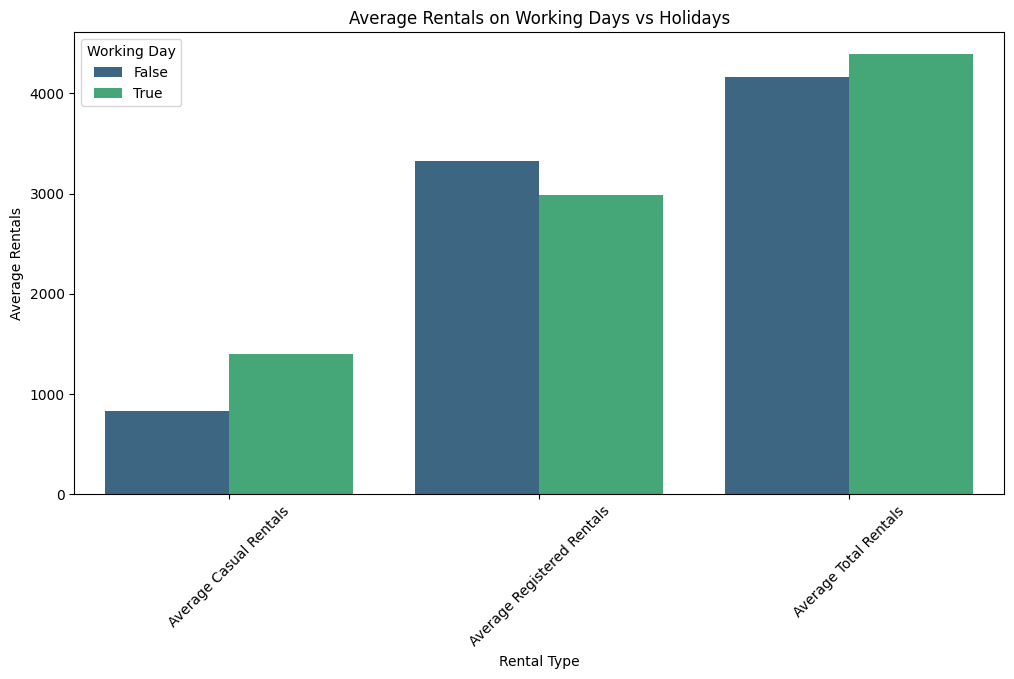

In [155]:
# membuat group untuk memudahkan ploting
melted_data = grouped_data.melt(id_vars=['Working Day', 'Holiday'], 
                                  value_vars=['Average Casual Rentals', 'Average Registered Rentals', 'Average Total Rentals'],
                                  var_name='Rental Type', value_name='Average Rentals')

# membuat plot chart
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='Rental Type', y='Average Rentals', hue='Working Day', palette='viridis',ci=None)
plt.title('Average Rentals on Working Days vs Holidays')
plt.xlabel('Rental Type')
plt.ylabel('Average Rentals')
# plt.legend(title='Working Day', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Kombinasi musim, hari kerja, dan kondisi cuaca sangat memengaruhi penyewaan sepeda. Musim panas adalah waktu paling sibuk, dan ada perbedaan signifikan dalam penggunaan sepeda antara hari kerja dan akhir pekan. Ini memberi pemahaman penting bagi pengelola untuk mengoptimalkan layanan.

- Conclution pertanyaan 2 : Temperatur, kecepatan angin, dan kelembaban memiliki hubungan yang kuat dengan penggunaan sepeda, terutama untuk pengguna kasual. Data ini dapat digunakan untuk strategi pemasaran, seperti penawaran promosi pada hari-hari dengan temperatur tinggi, serta untuk penyesuaian layanan pada hari berangin atau lembab.

- Conclution Option : Analisis menunjukkan bahwa pola penyewaan sepeda antara hari kerja dan hari libur sangat berbeda. Pada hari kerja, jumlah pengguna terdaftar cenderung lebih tinggi dibandingkan dengan pengguna kasual, sedangkan pada hari libur, jumlah pengguna kasual meningkat secara signifikan. 